In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated. 

In [3]:
data= pd.read_csv("C:\DSA\Add_sales_data_2018 (1).csv")

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


<AxesSubplot:>

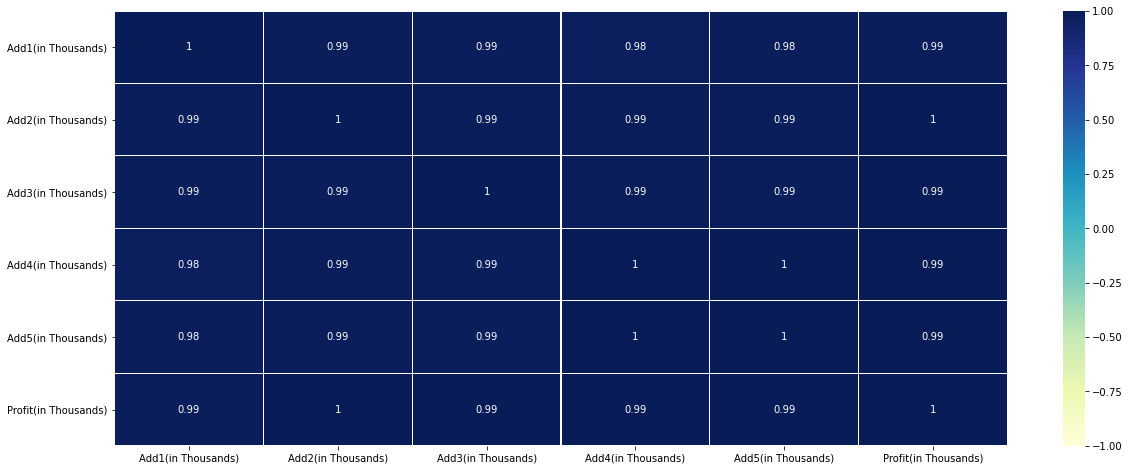

In [7]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

array([[<AxesSubplot:xlabel='Add1(in Thousands)', ylabel='Add1(in Thousands)'>,
        <AxesSubplot:xlabel='Add2(in Thousands)', ylabel='Add1(in Thousands)'>,
        <AxesSubplot:xlabel='Add3(in Thousands)', ylabel='Add1(in Thousands)'>,
        <AxesSubplot:xlabel='Add4(in Thousands)', ylabel='Add1(in Thousands)'>,
        <AxesSubplot:xlabel='Add5(in Thousands)', ylabel='Add1(in Thousands)'>,
        <AxesSubplot:xlabel='Profit(in Thousands)', ylabel='Add1(in Thousands)'>],
       [<AxesSubplot:xlabel='Add1(in Thousands)', ylabel='Add2(in Thousands)'>,
        <AxesSubplot:xlabel='Add2(in Thousands)', ylabel='Add2(in Thousands)'>,
        <AxesSubplot:xlabel='Add3(in Thousands)', ylabel='Add2(in Thousands)'>,
        <AxesSubplot:xlabel='Add4(in Thousands)', ylabel='Add2(in Thousands)'>,
        <AxesSubplot:xlabel='Add5(in Thousands)', ylabel='Add2(in Thousands)'>,
        <AxesSubplot:xlabel='Profit(in Thousands)', ylabel='Add2(in Thousands)'>],
       [<AxesSubplot:xlabel='Add1(

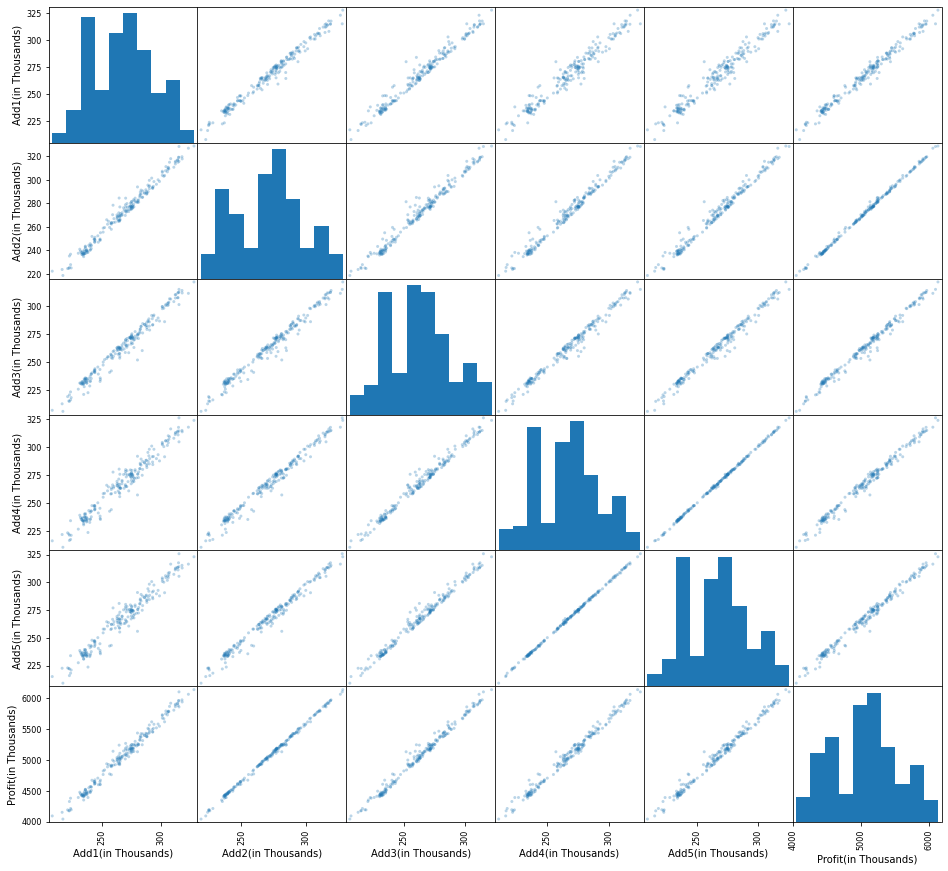

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(16,15), alpha=0.3)

Both Heatmap and scatter plot shows that there is a high positive correlation between amount spend for advertising through five differnt companies and profit generated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it. 

In [9]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [10]:
y=data['Profit(in Thousands)']
X=data.drop(['Date','Profit(in Thousands)'],axis=1)

In [11]:
X.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [13]:
from sklearn import linear_model
ir=linear_model.LinearRegression()

In [14]:
model=ir.fit(X_train,y_train)

In [15]:
predictions=model.predict(X_test)

In [16]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [17]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [18]:
from sklearn.metrics import mean_squared_error

In [25]:
print("Mean Squired Error(MSE) IS",mean_squared_error(y_test,predictions))

Mean Squired Error(MSE) IS 7.31736695719986e-25


# R _squared value

In [21]:
from sklearn.metrics import r2_score

In [22]:
score=r2_score(y_test,predictions)

In [23]:
print(score)

1.0


The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model. R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.Here R-squared value is 1 and the model is fit. The other way to evaluate the overall fit of a linear model is MSE value. Smaller the MSE,better the result. As the MSE value is very small here, the model is fit.

# . Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 

Add1(in Thousands) 290, 
Add2(in Thousands) 312,
Add3(in Thousands) 309, 
Add4(in Thousands) 298 ,
Add5(in Thousands) 320 



In [26]:
add1=290
add2=312
add3=309
add4=298
add5=320

In [28]:
print("predicted profit in thousands:\n",model.predict([[add1,add2,add3,add4,add5]]))

predicted profit in thousands:
 [5820.06]



The predicted profit by spending money in thousands in the  five different companies , add1-290,add2-312,add3-309,add4-298 and add5-320  is 5820.06 in thousands